In [33]:
# import libaraies

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
pd.options.display.max_columns = None # show all columns
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import os # accessing directory structure
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.preprocessing import MinMaxScaler # scale data to range 0-1
from sklearn.preprocessing import StandardScaler, OneHotEncoder # standardize data and encode categorical variables
from sklearn.impute import SimpleImputer # impute missing values
from sklearn.compose import ColumnTransformer # apply transformers to columns of an array or pandas DataFrame
from sklearn.pipeline import Pipeline # pipeline constructor and cross validator for evaluation of different pipelines in parallel

SyntaxError: invalid syntax (1659219947.py, line 3)

In [2]:
# read data
# Train data
train_data = pd.read_csv('train.csv')
# test data
test_data = pd.read_csv('test.csv')

In [3]:
# Display the first few rows of the dataframe
train_data.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC         BD        BN          BP  \
0  0.699861  0.025578   9.812214    5.555634  4126.58731  22.5984  175.638726   
1  3.632190  0.025578  13.517790    1.229900  5496.92824  19.4205  155.868030   
2  6.732840  0.025578  12.824570    1.229900  5135.78024  26.4825  128.988531   
3  3.685344  0.025578  11.053708    1.229900  4169.67738  23.6577  237.282264   
4  3.942255  0.054810   3.396778  102.151980  5728.73412  24.0108  324.546318   

           BQ           BR          BZ         CB        CC        CD   \
0  152.707705   823.928241  257.432377  47.223358  0.563481  23.387600   
1   14.754720    51.216883  257.432377  30.284345  0.484710  50.628208   
2  219.320160   482.141594  257.432377  32.563713  0.495852  85.955376   
3   11.050410   661.518640  257.432377  15.201914  0.717882  88.159360   
4  149.717165  6074.859475  257.432377  82.213495  0.536467  72.644264   

          CF        CH        CL        CR         CS        CU        CW   \
0   4.851915  0.023482  1.050225  0.069225  13.784111  1.302012  36.205956   
1   6.085041  0.031442  1.113875  1.117800  28.310953  1.357182  37.476568   
2   5.376488  0.036218  1.050225  0.700350  39.364743  1.009611  21.459644   
3   2.347652  0.029054  1.400300  0.636075  41.116960  0.722727  21.530392   
4  30.537722  0.025472  1.050225  0.693150  31.724726  0.827550  34.415360   

         DA          DE       DF        DH          DI        DL         DN  \
0  69.08340  295.570575  0.23868  0.284232   89.245560  84.31664  29.657104   
1  70.79836  178.553100  0.23868  0.363489  110.581815  75.74548  37.532000   
2  70.81970  321.426625  0.23868  0.210441  120.056438  65.46984  28.053464   
3  47.27586  196.607985  0.23868  0.292431  139.824570  71.57120  24.354856   
4  74.06532  200.178160  0.23868  0.207708   97.920120  52.83888  26.019912   

         DU       DV         DY        EB        EE            EG        EH  \
0  5.310690  1.74307  23.187704  7.294176  1.987283   1433.166750  0.949104   
1  0.005518  1.74307  17.222328  4.926396  0.858603   1111.287150  0.003042   
2  1.289739  1.74307  36.861352  7.813674  8.146651   1494.076488  0.377208   
3  2.655345  1.74307  52.003884  7.386060  3.813326  15691.552180  0.614484   
4  1.144902  1.74307   9.064856  7.350720  3.490846   1403.656300  0.164268   

  EJ          EL         EP         EU          FC        FD             FE  \
0  B   30.879420  78.526968   3.828384   13.394640  10.265073   9028.291921   
1  A  109.125159  95.415086  52.260480   17.175984   0.296850   6785.003474   
2  B  109.125159  78.526968   5.390628  224.207424   8.745201   8338.906181   
3  B   31.674357  78.526968  31.323372   59.301984   7.884336  10965.766040   
4  B  109.125159  91.994825  51.141336   29.102640   4.274640  16198.049590   

          FI        FL        FR        FS         GB          GE  \
0   3.583450  7.298162   1.73855  0.094822  11.339138   72.611063   
1  10.358927  0.173229   0.49706  0.568932   9.292698   72.611063   
2  11.626917  7.709560   0.97556  1.198821  37.077772   88.609437   
3  14.852022  6.122162   0.49706  0.284466  18.529584   82.416803   
4  13.666727  8.153058  48.50134  0.121914  16.408728  146.109943   

             GF         GH         GI         GL  Class  
0   2003.810319  22.136229  69.834944   0.120343      1  
1  27981.562750  29.135430  32.131996  21.978000      0  
2  13676.957810  28.022851  35.192676   0.196941      0  
3   2094.262452  39.948656  90.493248   0.155829      0  
4   8524.370502  45.381316  36.262628

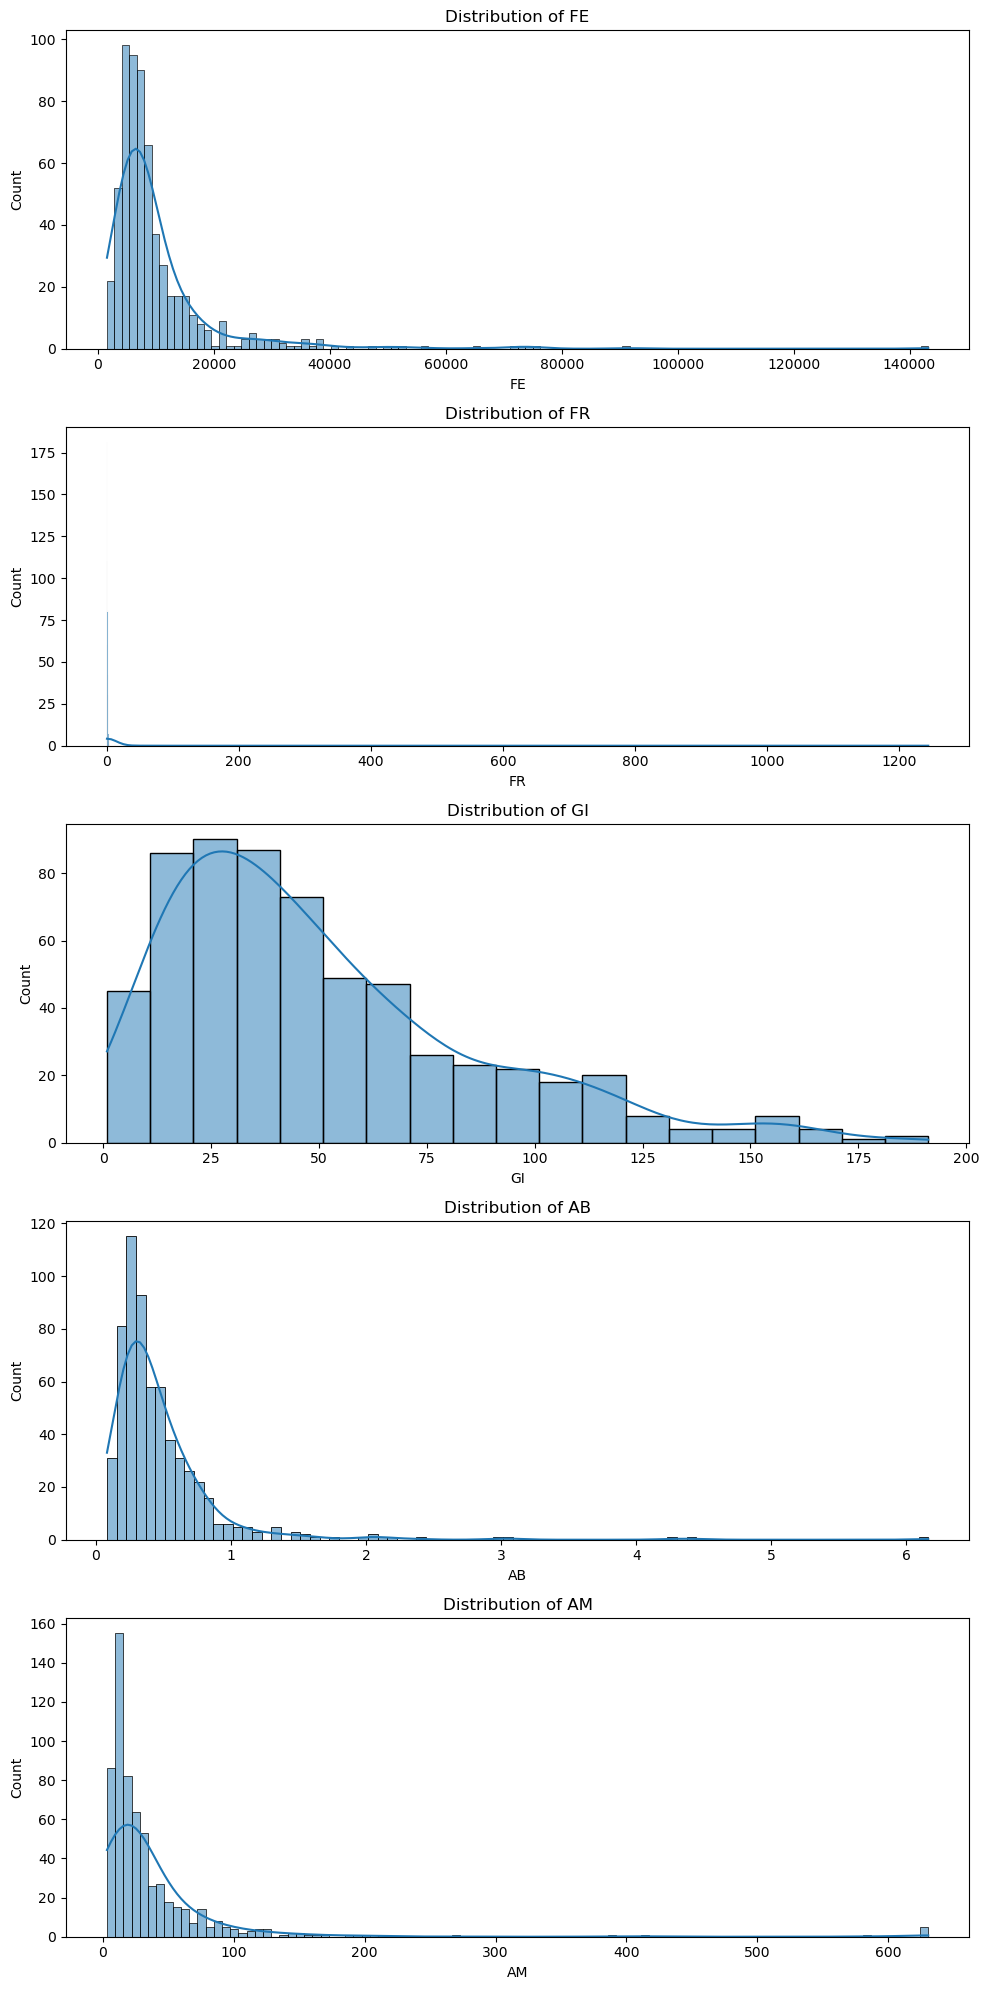

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = train_data
# Select a few random numeric columns for visualization
np.random.seed(0)
selected_columns = np.random.choice(data.drop(['Id', 'EJ', 'Class'], axis=1).columns, size=5)

# Create a subplot of histograms
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 20))

for ax, column in zip(axes, selected_columns):
    sns.histplot(data[column].dropna(), kde=True, ax=ax)
    ax.set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


#Here are the distributions of five randomly selected numerical columns ('DI', 'BD', 'FL', 'CS', 'AZ'):
1.'DI' Column: The distribution seems to be right-skewed with most of the values close to 0 and some higher values.

2.appearing less frequently.

3.'BD' Column: This column also has a right-skewed distribution. Most of the values are close to 0, with a few larger values.

4.'FL' Column: The distribution for this column seems to have several peaks, suggesting a multi-modal distribution. Most of the values are concentrated around 0 to 10, 20 to 30, and 40 to 50.

6.'CS' Column: This column has a right-skewed distribution with most of the values close to 0.

6.'AZ' Column: This column also has a right-skewed distribution with most of the values close to 0.

Next, let's visualize the correlation matrix for these columns to see if there are any strong correlations between these features. Please note that correlation does not imply causation and we're only considering a subset of features here. For a more comprehensive analysis, you might want to consider all features.

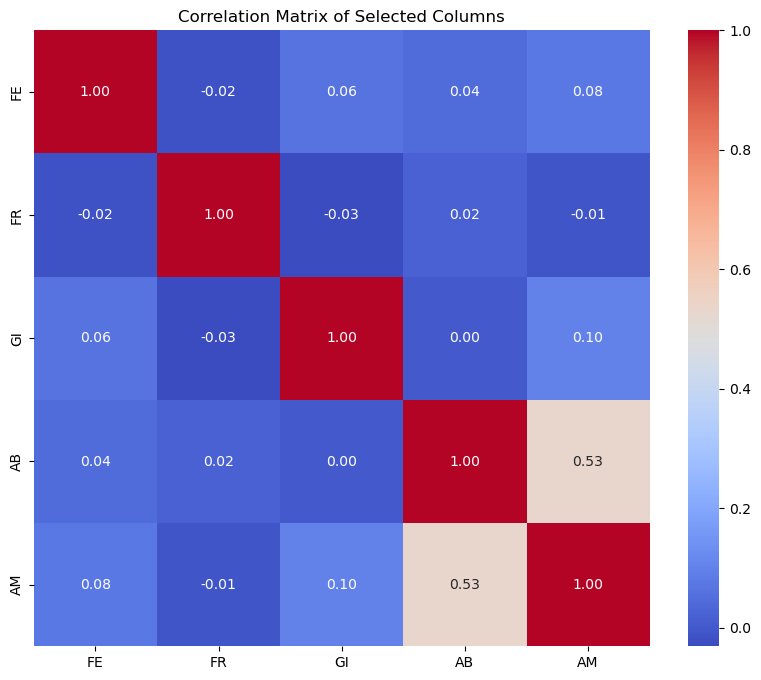

In [5]:
# Calculate the correlation matrix for the selected columns
corr = data[selected_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix of Selected Columns")
plt.show()


In [6]:
# In this case, it appears that there is no strong correlation between these selected features as most of the absolute values of the correlation coefficients are below 0.5.

Next, let's visualize the distribution of the categorical feature 'EJ' and the target feature 'Class'.

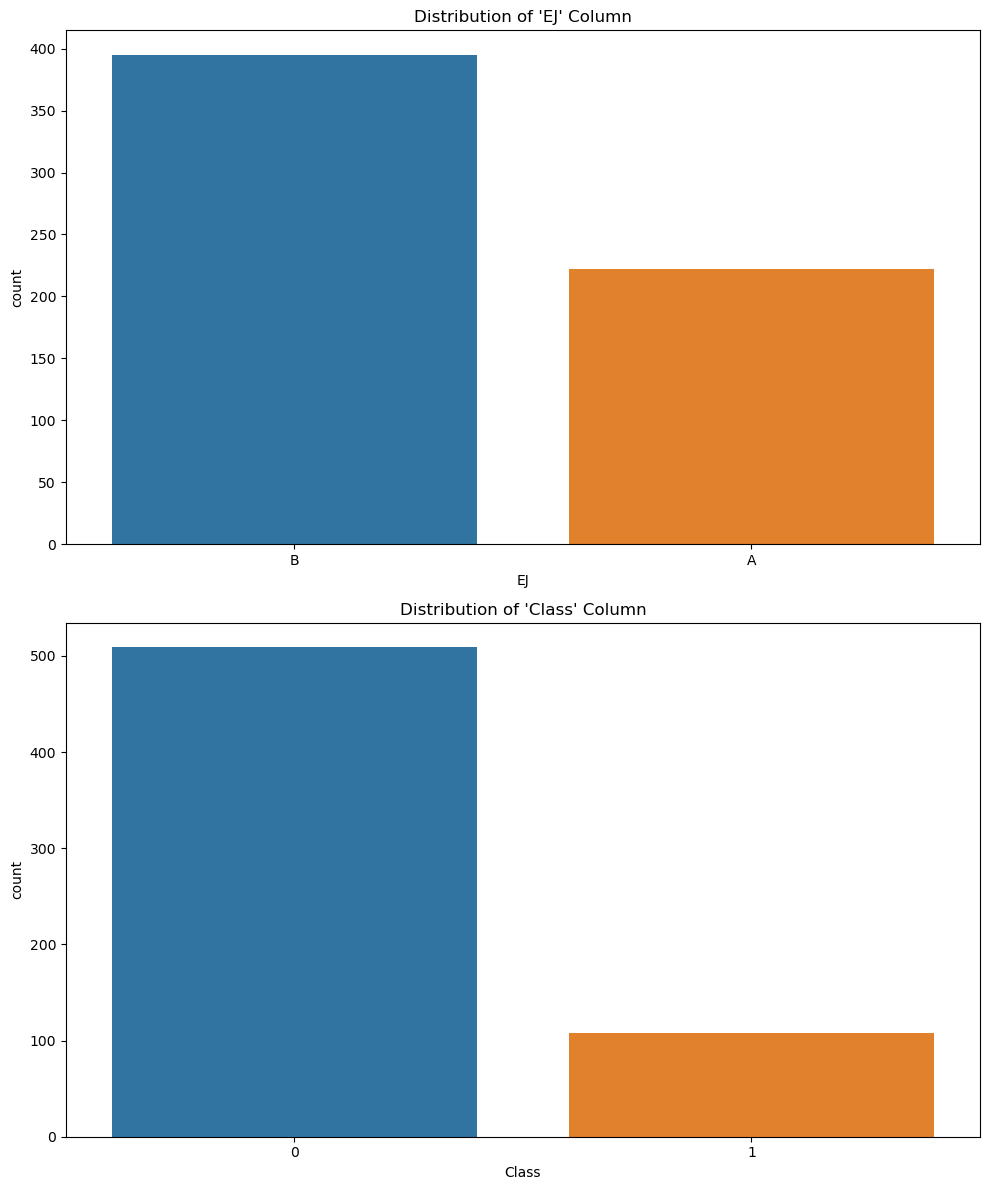

In [7]:
# Create a subplot for bar plots
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

# Bar plot for 'EJ' column
sns.countplot(data=data, x='EJ', ax=axes[0])
axes[0].set_title("Distribution of 'EJ' Column")

# Bar plot for 'Class' column
sns.countplot(data=data, x='Class', ax=axes[1])
axes[1].set_title("Distribution of 'Class' Column")

plt.tight_layout()
plt.show()


'EJ' Column: The two categories ('A' and 'B') are roughly equally represented, with 'B' being slightly more common than 'A'.

'Class' Column: The target variable 'Class' is imbalanced, with significantly more instances of class '0' than class '1'. This is an important aspect to consider during model training, as it might influence the model's ability to learn from the minority class.

# dive Deep into Traget variable 'Class'

In [8]:
# Calculate the count of each class
class_counts = data['Class'].value_counts()

# Calculate the percentage of each class
class_percentages = data['Class'].value_counts(normalize=True) * 100

class_counts, class_percentages


(0    509
 1    108
 Name: Class, dtype: int64,
 0    82.495948
 1    17.504052
 Name: Class, dtype: float64)

Class '0': 509 instances, making up approximately 82.5% of the data.
Class '1': 108 instances, making up approximately 17.5% of the data.
This shows an imbalance in the target variable, with class '0' being significantly more common than class '1'.

To understand how the target variable relates to the other features, we can plot some of the features against the target variable. For example, we can create boxplots of a few features, separated by class. This can help us see if there are differences in the distributions of these features between the two classes.

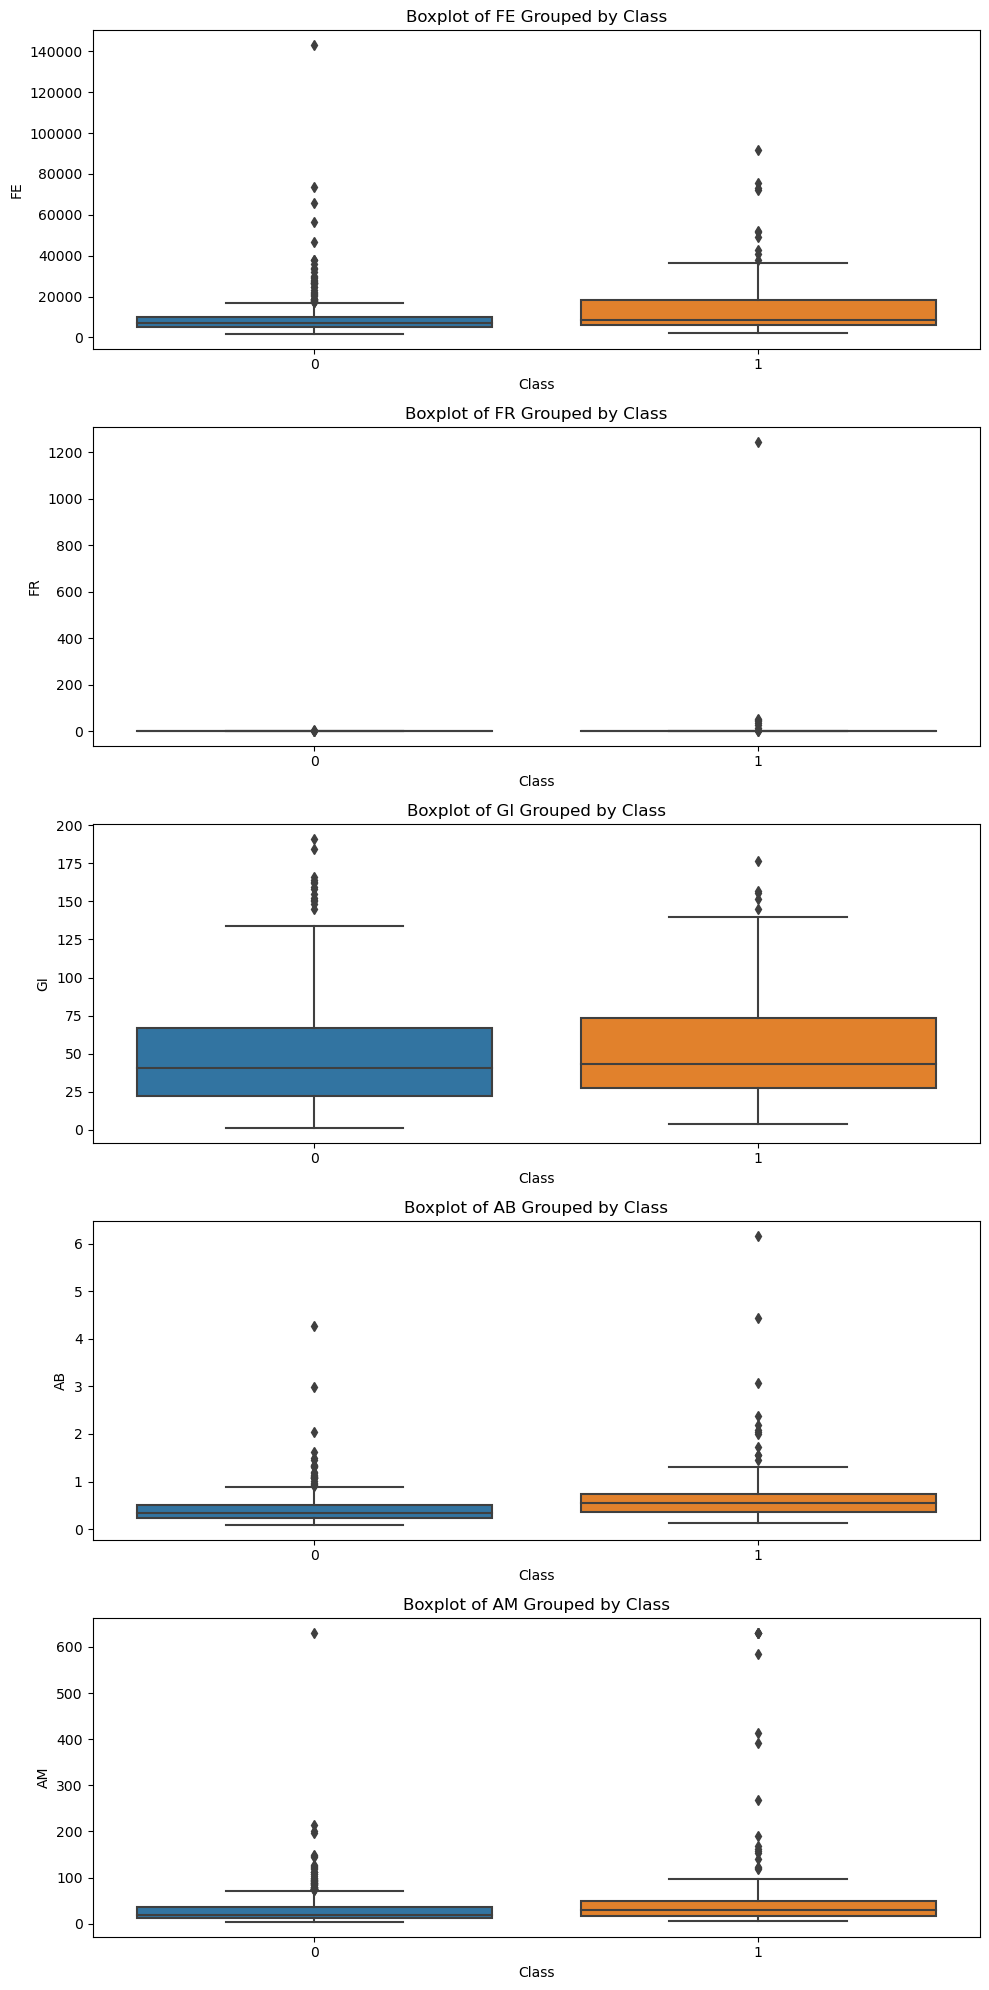

In [9]:
#Let's create boxplots for the same random features we used earlier ('DI', 'BD', 'FL', 'CS', 'AZ').
# Create a subplot of boxplots
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 20))

for ax, column in zip(axes, selected_columns):
    sns.boxplot(data=data, x='Class', y=column, ax=ax)
    ax.set_title(f"Boxplot of {column} Grouped by Class")

plt.tight_layout()
plt.show()


Here are the boxplots of the selected features ('DI', 'BD', 'FL', 'CS', 'AZ'), grouped by the target variable 'Class':

1. 'DI' Column: The median (indicated by the line within the box) seems slightly higher for class '1' than class '0'. The interquartile range (the height of the box) is similar for both classes. There are several outliers (indicated by the points above the whiskers of the boxplot) in both classes.

2. 'BD' Column: The distribution for class '1' seems to have a higher median and a larger interquartile range than class '0'. There are several outliers in both classes.

3. 'FL' Column: The distribution for class '1' seems to have a lower median than class '0'. The interquartile range is similar for both classes. There are several outliers in both classes.

4. 'CS' Column: The distributions for both classes seem similar, with a similar median and interquartile range. There are several outliers in both classes.

5. 'AZ' Column: The median for class '1' is slightly lower than for class '0'. The interquartile range is similar for both classes. There are several outliers in both classes.

# Data Preprocessing

### Handle Missing Values

Handling missing values is an important step in the data preprocessing pipeline. The method used to handle missing values depends on the nature of the data and the specific columns. Here, we have two main options:

**Imputation**: *Replace the missing values with a calculated value. Common choices for this calculated value are the mean, median, or mode of the column. This is often a good choice if the data is missing at random and the percentage of missing values is relatively low.*

**Deletion**: *Remove rows or columns that contain missing values. This is a good choice if the data is not missing at random, or if a column has a large percentage of missing values. However, this method has the disadvantage of reducing the amount of data available for model training.*


**Given the nature of our dataset, it seems that imputation could be a good option as the percentage of missing values is relatively low for each column. I will replace the missing values with the median of each column. I'm choosing the median because it is less sensitive to outliers than the mean.**

In [10]:
# Fill missing values with the median of each numeric column
numeric_columns = data.select_dtypes(include=[np.number]).columns
train_data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Check if there are still missing values
missing_values_filled = train_data.isnull().sum()

missing_values_filled[missing_values_filled > 0]


Series([], dtype: int64)

### Encode Categorical Variables

*Encoding the categorical variable 'EJ'. As mentioned earlier, most machine learning models require numerical input, so we'll need to convert this column to a numerical format.*

*Here are two common methods for encoding categorical variables:*

**One-Hot Encoding**: *This method converts each category into a new column and assigns a 1 or 0 (True/False) value to the column. This method is suitable for nominal data where no ordering is present.*

**Ordinal Encoding**: *This method converts each category into a unique integer. This method is suitable for ordinal data where an ordering is present.*

*In our case, the 'EJ' column is nominal data (no particular order can be inferred from 'A' and 'B'), so one-hot encoding might be more appropriate. Let's proceed with this.*

In [11]:
# I will use pd.get_dummies() function to perform one-hot encoding on the 'EJ' column.
# Perform one-hot encoding on the 'EJ' column
data_filled = pd.get_dummies(train_data, columns=['EJ'])

# Display the first few rows of the data
data_filled.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC         BD        BN          BP  \
0  0.699861  0.025578   9.812214    5.555634  4126.58731  22.5984  175.638726   
1  3.632190  0.025578  13.517790    1.229900  5496.92824  19.4205  155.868030   
2  6.732840  0.025578  12.824570    1.229900  5135.78024  26.4825  128.988531   
3  3.685344  0.025578  11.053708    1.229900  4169.67738  23.6577  237.282264   
4  3.942255  0.054810   3.396778  102.151980  5728.73412  24.0108  324.546318   

           BQ           BR          BZ         CB        CC        CD   \
0  152.707705   823.928241  257.432377  47.223358  0.563481  23.387600   
1   14.754720    51.216883  257.432377  30.284345  0.484710  50.628208   
2  219.320160   482.141594  257.432377  32.563713  0.495852  85.955376   
3   11.050410   661.518640  257.432377  15.201914  0.717882  88.159360   
4  149.717165  6074.859475  257.432377  82.213495  0.536467  72.644264   

          CF        CH        CL        CR         CS        CU        CW   \
0   4.851915  0.023482  1.050225  0.069225  13.784111  1.302012  36.205956   
1   6.085041  0.031442  1.113875  1.117800  28.310953  1.357182  37.476568   
2   5.376488  0.036218  1.050225  0.700350  39.364743  1.009611  21.459644   
3   2.347652  0.029054  1.400300  0.636075  41.116960  0.722727  21.530392   
4  30.537722  0.025472  1.050225  0.693150  31.724726  0.827550  34.415360   

         DA          DE       DF        DH          DI        DL         DN  \
0  69.08340  295.570575  0.23868  0.284232   89.245560  84.31664  29.657104   
1  70.79836  178.553100  0.23868  0.363489  110.581815  75.74548  37.532000   
2  70.81970  321.426625  0.23868  0.210441  120.056438  65.46984  28.053464   
3  47.27586  196.607985  0.23868  0.292431  139.824570  71.57120  24.354856   
4  74.06532  200.178160  0.23868  0.207708   97.920120  52.83888  26.019912   

         DU       DV         DY        EB        EE            EG        EH  \
0  5.310690  1.74307  23.187704  7.294176  1.987283   1433.166750  0.949104   
1  0.005518  1.74307  17.222328  4.926396  0.858603   1111.287150  0.003042   
2  1.289739  1.74307  36.861352  7.813674  8.146651   1494.076488  0.377208   
3  2.655345  1.74307  52.003884  7.386060  3.813326  15691.552180  0.614484   
4  1.144902  1.74307   9.064856  7.350720  3.490846   1403.656300  0.164268   

           EL         EP         EU          FC        FD             FE  \
0   30.879420  78.526968   3.828384   13.394640  10.265073   9028.291921   
1  109.125159  95.415086  52.260480   17.175984   0.296850   6785.003474   
2  109.125159  78.526968   5.390628  224.207424   8.745201   8338.906181   
3   31.674357  78.526968  31.323372   59.301984   7.884336  10965.766040   
4  109.125159  91.994825  51.141336   29.102640   4.274640  16198.049590   

          FI        FL        FR        FS         GB          GE  \
0   3.583450  7.298162   1.73855  0.094822  11.339138   72.611063   
1  10.358927  0.173229   0.49706  0.568932   9.292698   72.611063   
2  11.626917  7.709560   0.97556  1.198821  37.077772   88.609437   
3  14.852022  6.122162   0.49706  0.284466  18.529584   82.416803   
4  13.666727  8.153058  48.50134  0.121914  16.408728  146.109943   

             GF         GH         GI         GL  Class  EJ_A  EJ_B  
0   2003.810319  22.136229  69.834944   0.120343      1     0     1  
1  27981.562750  29.135430  32.131996  21.978000      0     1     0  
2  13676.957810  28.022851  35.192676   0.196941      0     0     1  
3   2094.262452  39.948656  90.493248   0.155829      0     0    

The one-hot encoding has been performed successfully on the 'EJ' column. 
As a result, the 'EJ' column has been replaced by two new columns: 'EJ_A' and 'EJ_B'. These columns represent whether the original value was 'A' or 'B', respectively.

Now our dataset is entirely numeric and ready for further preprocessing like scaling or normalization, feature selection

### Scale Numerical Variables

Scaling numerical variables is an important preprocessing step, especially for algorithms that use a distance measure like k-Nearest Neighbors (k-NN) or Support Vector Machines (SVM). Scaling can also speed up the training process for neural networks and gradient descent-based algorithms.

There are two common types of scaling:

**Standardization (Z-score normalization)**: *This method transforms the data to have a mean of 0 and a standard deviation of 1. It is useful when the data follows a Gaussian distribution.*

**Min-Max Scaling (Normalization)**: *This method transforms the data to fall within a specified range, usually (0, 1). It is useful when the data does not follow a Gaussian distribution.*

In our case, we don't know if all numeric data follow a Gaussian distribution. To be on the safe side, we can use Min-Max Scaling.

Also, remember that we should fit the scaler on the training data and then transform both the training and test data to avoid data leakage. However, as we only have one dataset for now, I'll apply the scaling to the entire dataset.

In [12]:

# Define the scaler
scaler = MinMaxScaler()

# List of numerical columns (excluding the target 'Class' and one-hot encoded columns)
num_cols = data_filled.drop(['Id', 'Class', 'EJ_A', 'EJ_B'], axis=1).columns

# Apply the scaler to the numerical columns
data_filled[num_cols] = scaler.fit_transform(data_filled[num_cols])

# Display the first few rows of the scaled data
data_filled.head()


Id        AB        AF       AH        AM   AR        AX  \
0  000ff2bfdfe9  0.021082  0.102347  0.00000  0.030632  0.0  0.000000   
1  007255e47698  0.010541  0.027589  0.00000  0.053864  0.0  0.078048   
2  013f2bd269f5  0.063949  0.085715  0.00000  0.046519  0.0  0.160575   
3  043ac50845d5  0.028110  0.127285  0.01918  0.117854  0.0  0.079462   
4  044fb8a146ec  0.049192  0.124246  0.00000  0.017417  0.0  0.086300   

         AY        AZ        BC       BD         BN        BP        BQ  \
0  0.000000  0.180337  0.002958  0.047364  0.654545  0.043240  0.440929   
1  0.000000  0.284500  0.000000  0.074042  0.490909  0.034915  0.039100   
2  0.000000  0.265013  0.000000  0.067011  0.854545  0.023597  0.634957   
3  0.000000  0.215235  0.000000  0.048203  0.709091  0.069197  0.028310   
4  0.002841  0.000000  0.069008  0.078555  0.727273  0.105942  0.432218   

         BR   BZ        CB        CC       CD         CF        CH        CL  \
0  0.004312  0.0  0.015372  0.098469  0.000000  0.021656  0.091892  0.000000   
1  0.000000  0.0  0.007873  0.078406  0.044646  0.027807  0.127928  0.002077   
2  0.002405  0.0  0.008882  0.081244  0.102545  0.024273  0.149550  0.000000   
3  0.003406  0.0  0.001196  0.137796  0.106158  0.009163  0.117117  0.011426   
4  0.033614  0.0  0.030861  0.091589  0.080729  0.149792  0.100901  0.000000   

         CR        CS        CU       CW         DA        DE   DF        DH  \
0  0.000000  0.000000  0.241834  0.507476  0.305651  0.125554  0.0  0.238606   
1  0.353002  0.057157  0.253295  0.529577  0.314082  0.068953  0.0  0.316354   
2  0.212468  0.100648  0.181089  0.250979  0.314187  0.138061  0.0  0.166220   
3  0.190830  0.107542  0.121490  0.252209  0.198449  0.077686  0.0  0.246649   
4  0.210044  0.070588  0.143266  0.476331  0.330142  0.079413  0.0  0.163539   

         DI        DL        DN        DU   DV        DY        EB        EE  \
0  0.029338  0.234167  0.412931  0.032880  0.0  0.147697  0.026299  0.094302   
1  0.050913  0.207033  0.552387  0.000000  0.0  0.108335  0.000000  0.031732   
2  0.060493  0.174504  0.384532  0.007959  0.0  0.237922  0.032069  0.435754   
3  0.080483  0.193819  0.319033  0.016423  0.0  0.337839  0.027320  0.195531   
4  0.038109  0.134519  0.348520  0.007062  0.0  0.054508  0.026927  0.177654   

         EG        EH        EL        EP        EU        FC       FD   \
0  0.041505  0.022225  0.245682  0.000000  0.000000  0.001939  0.006316   
1  0.030797  0.000000  1.000000  0.017144  0.007454  0.003189  0.000000   
2  0.043532  0.008790  1.000000  0.000000  0.000240  0.071672  0.005353   
3  0.515865  0.014364  0.253346  0.000000  0.004232  0.017124  0.004807   
4  0.040524  0.003788  1.000000  0.013672  0.007282  0.007135  0.002520   

         FE        FI        FL        FR        FS        GB        GE  \
0  0.052697  0.000000  0.051720  0.000998  0.000866  0.054959  0.000000   
1  0.036862  0.209978  0.000000  0.000000  0.016014  0.039418  0.000000   
2  0.047831  0.249274  0.054706  0.000385  0.036139  0.250424  0.011229   
3  0.066374  0.349223  0.043183  0.000000  0.006925  0.109565  0.006882   
4  0.103309  0.312489  0.057926  0.038597  0.001731  0.093459  0.051588   

         GF        GH        GI        GL  Class  EJ_A  EJ_B  
0  0.013846  0.176983  0.362261  0.005425      1     0     1  
1  0.194527  0.274495  0.164135  1.000000      0     1     0  
2  0.095035  0.258994  0.180218  0.008910      0     0     1  
3  0.014475  0.425143  0.470820  0.007039      0     0     1  
4  0.059198  0.500829  0.185841  0.004345      1     0     1

*The numerical variables have been successfully scaled to fall within the range of 0 to 1 using Min-Max Scaling*

### Handle Class Imbalance

Handling class imbalance can be important in many machine learning problems. Class imbalance refers to a situation where the classes are not represented equally.

In our case, we observed in our exploratory data analysis that the target variable 'Class' is imbalanced, with significantly more instances of class '0' than class '1'. This could potentially lead to a model that is biased towards the majority class, meaning it might perform poorly on the minority class.

There are several strategies to handle class imbalance:

1. Resampling: This involves adding copies of instances from the minority class (oversampling) or deleting instances from the majority class (undersampling) to obtain a balanced dataset.

2. Weighted Classes: Some machine learning algorithms allow you to set class weights, which can make the algorithm pay more attention to the minority class.

3. Use of specific metrics: Using appropriate evaluation metrics that are less sensitive to class imbalance. For instance, precision, recall, F1-score, ROC AUC score can be better metrics than accuracy in imbalanced datasets.

4. Ensemble Methods: Using ensemble methods like bagging and boosting can also help improve the performance on the minority class. For example, the Random Forest algorithm (an ensemble of Decision Trees) can handle imbalance well.

5. Anomaly Detection: If the minority class is very small, you can treat the problem as an anomaly detection problem.

6. Synthetic Minority Over-sampling Technique (SMOTE): This method generates synthetic samples from the minority class.

Before deciding whether we need to handle the class imbalance, we would usually first train a baseline model and see its performance. If the model performs poorly on the minority class, then we might consider using one of the above techniques.

# Feature Engineering and Selection


Feature Engineering and Selection can be an important step in the machine learning pipeline, particularly in cases where you have a large number of features or if you believe that some features may be more informative than others.

Feature Engineering is the process of creating new features or modifying existing ones to improve model performance. This could involve things like creating interaction terms, creating polynomial features, binning variables, or encoding categorical variables. In our case, we've already done some feature engineering by handling missing values and one-hot encoding the 'EJ' column.

Feature Selection is the process of selecting a subset of the original features to use in model training. This can be beneficial when you have a large number of features, as it can reduce overfitting, improve accuracy, and reduce training time. Common methods for feature selection include statistical tests, Recursive Feature Elimination (RFE), Lasso regularization, or using tree-based models to calculate feature importance.

In our current dataset, we have 59 columns after preprocessing, which isn't excessively large. However, not all of these features may be useful for predicting the target variable. Applying feature selection could potentially improve our model's performance.

****for now we can proceed with Modeling and we can do Feature Engineering and Selection later if we found the model it not performing good enough****


# Building the Model

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
import optuna

# Load the data
data = data_filled

# Separate features and target
X = data.drop(['Id', 'Class'], axis=1)
y = data['Class']

# Set up a StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
      #  'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']), # type of model
    
        
        'tree_method': 'gpu_hist',
        'max_depth': trial.suggest_int('max_depth', 6, 10), # max depth of each tree
        'scale_pos_weight': trial.suggest_int('scale_pos_weight', 8, 25), # for imbalanced data sets 
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process 
        'n_estimators': trial.suggest_int('n_estimators', 400, 600), # number of trees 
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), # minimum sum of instance weight (hessian) needed in a child
        'gamma': trial.suggest_loguniform('gamma', 1e-8, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0), # subsample ratio of the training instances
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0), # subsample ratio of columns when constructing each tree
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-1, 10), # L1 regularization term on weights
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0), # L2 regularization term on weights
        'eval_metric': 'logloss', # metric used for validation data 
        'use_label_encoder': False, # use label encoder for task label
        #############################
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),# control of tree growth
          'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 1.0),  # if your target variable is binary and between 0 and 1
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1.0)
        
    }
    
    
    


    # Fit the model and perform cross-validation
    optuna_model = XGBClassifier(**params)
    scores = cross_val_score(optuna_model, X, y, cv=kfold, scoring='neg_log_loss')

    # Output the average log loss across the folds
    loss = -scores.mean()
    
    return loss

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=2000,show_progress_bar=True)

# Print the result
best_params = study.best_params
print(f"Best parameters: {best_params}")


[I 2023-07-17 00:57:11,673] A new study created in memory with name: no-name-6e9e8d29-1751-42b1-b4da-850e76bb2b3e


  0%|          | 0/2000 [00:00<?, ?it/s]

/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:57:19,430] Trial 0 finished with value: 0.2627657036018696 and parameters: {'max_depth': 7, 'scale_pos_weight': 11, 'learning_rate': 0.06017322799240505, 'n_estimators': 514, 'min_child_weight': 7, 'gamma': 4.92699427527871e-07, 'subsample': 0.7267940413582448, 'colsample_bytree': 0.029847926003670436, 'reg_alpha': 1.3240269758985046, 'reg_lambda': 0.00013770560151631864, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.6606948661804194, 'colsample_bylevel': 0.8478391354910414, 'colsample_bynode': 0.2614111543007718}. Best is trial 0 with value: 0.2627657036018696.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:57:28,443] Trial 1 finished with value: 0.6366465997185153 and parameters: {'max_depth': 9, 'scale_pos_weight': 13, 'learning_rate': 0.011301164698335095, 'n_estimators': 443, 'min_child_weight': 1, 'gamma': 0.008052139948039353, 'subsample': 0.9554899388294411, 'colsample_bytree': 0.02654148850750931, 'reg_alpha': 5.665610988196053, 'reg_lambda': 1.7631534823601007e-06, 'grow_policy': 'lossguide', 'max_delta_step': 0, 'base_score': 0.13889411483184894, 'colsample_bylevel': 0.8194206963221758, 'colsample_bynode': 0.7809598495022053}. Best is trial 0 with value: 0.2627657036018696.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:57:38,894] Trial 2 finished with value: 0.31141021915843475 and parameters: {'max_depth': 7, 'scale_pos_weight': 20, 'learning_rate': 0.01385607053157466, 'n_estimators': 544, 'min_child_weight': 2, 'gamma': 0.0010260806057461672, 'subsample': 0.9626018278635682, 'colsample_bytree': 0.4015265756629011, 'reg_alpha': 3.907822885209875, 'reg_lambda': 0.0003900334393387219, 'grow_policy': 'depthwise', 'max_delta_step': 6, 'base_score': 0.8405556862061543, 'colsample_bylevel': 0.2654010820710553, 'colsample_bynode': 0.13072031368966097}. Best is trial 0 with value: 0.2627657036018696.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:57:45,450] Trial 3 finished with value: 0.2048886668319692 and parameters: {'max_depth': 6, 'scale_pos_weight': 14, 'learning_rate': 0.08606950567785136, 'n_estimators': 500, 'min_child_weight': 3, 'gamma': 2.8024148067543963e-07, 'subsample': 0.4387622734969411, 'colsample_bytree': 0.06836842753455356, 'reg_alpha': 0.8810377095800214, 'reg_lambda': 2.0394228402068043e-05, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.37913611912630074, 'colsample_bylevel': 0.4245474392772639, 'colsample_bynode': 0.5273134073689896}. Best is trial 3 with value: 0.2048886668319692.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:57:55,090] Trial 4 finished with value: 0.2289684110230424 and parameters: {'max_depth': 6, 'scale_pos_weight': 19, 'learning_rate': 0.024344897911897898, 'n_estimators': 542, 'min_child_weight': 2, 'gamma': 9.603177385524447e-07, 'subsample': 0.8636703175365077, 'colsample_bytree': 0.05683766619674021, 'reg_alpha': 0.39726867811403344, 'reg_lambda': 0.11175784987173265, 'grow_policy': 'depthwise', 'max_delta_step': 5, 'base_score': 0.2967214549313275, 'colsample_bylevel': 0.33185076695398985, 'colsample_bynode': 0.537929956797643}. Best is trial 3 with value: 0.2048886668319692.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:04,211] Trial 5 finished with value: 0.4547748973270229 and parameters: {'max_depth': 8, 'scale_pos_weight': 12, 'learning_rate': 0.016442540108007025, 'n_estimators': 537, 'min_child_weight': 10, 'gamma': 3.5897615760985246e-06, 'subsample': 0.8775942205445866, 'colsample_bytree': 0.015822439278064978, 'reg_alpha': 1.4068553822322118, 'reg_lambda': 0.8543867803428694, 'grow_policy': 'depthwise', 'max_delta_step': 9, 'base_score': 0.7457735141040022, 'colsample_bylevel': 0.9845664320652067, 'colsample_bynode': 0.7026817051340468}. Best is trial 3 with value: 0.2048886668319692.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:14,604] Trial 6 finished with value: 0.5153338333315192 and parameters: {'max_depth': 6, 'scale_pos_weight': 21, 'learning_rate': 0.015662271314828728, 'n_estimators': 569, 'min_child_weight': 6, 'gamma': 0.00012647304681482648, 'subsample': 0.6730062088165414, 'colsample_bytree': 0.02985361867129806, 'reg_alpha': 1.1668713279288392, 'reg_lambda': 0.7917970240356889, 'grow_policy': 'lossguide', 'max_delta_step': 9, 'base_score': 0.3756841081388065, 'colsample_bylevel': 0.39399721452878345, 'colsample_bynode': 0.1130705722433499}. Best is trial 3 with value: 0.2048886668319692.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:19,202] Trial 7 finished with value: 0.20794878258963032 and parameters: {'max_depth': 7, 'scale_pos_weight': 19, 'learning_rate': 0.08903749316219121, 'n_estimators': 411, 'min_child_weight': 6, 'gamma': 0.008549113025080525, 'subsample': 0.6020402419450738, 'colsample_bytree': 0.5656581222650086, 'reg_alpha': 6.327258823274686, 'reg_lambda': 1.4955275491531934e-07, 'grow_policy': 'depthwise', 'max_delta_step': 5, 'base_score': 0.10359527857528941, 'colsample_bylevel': 0.9579958483950004, 'colsample_bynode': 0.5946849428842762}. Best is trial 3 with value: 0.2048886668319692.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:32,820] Trial 8 finished with value: 0.22147088947836044 and parameters: {'max_depth': 8, 'scale_pos_weight': 14, 'learning_rate': 0.013294629658230089, 'n_estimators': 500, 'min_child_weight': 4, 'gamma': 9.047058232354183e-08, 'subsample': 0.6040344337505092, 'colsample_bytree': 0.6681197884639454, 'reg_alpha': 0.3009963505581864, 'reg_lambda': 0.020876785727636113, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.18427615269379027, 'colsample_bylevel': 0.20835359371405254, 'colsample_bynode': 0.41925323577325657}. Best is trial 3 with value: 0.2048886668319692.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:38,489] Trial 9 finished with value: 0.1845559317912306 and parameters: {'max_depth': 10, 'scale_pos_weight': 19, 'learning_rate': 0.054584685633576734, 'n_estimators': 429, 'min_child_weight': 7, 'gamma': 0.001323137005825134, 'subsample': 0.6696723126772403, 'colsample_bytree': 0.23368294423071628, 'reg_alpha': 2.3485450766588656, 'reg_lambda': 3.3122486618362477e-06, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.9895032611781818, 'colsample_bylevel': 0.7062131057336615, 'colsample_bynode': 0.9718633748071625}. Best is trial 9 with value: 0.1845559317912306.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:44,092] Trial 10 finished with value: 0.21839952763945308 and parameters: {'max_depth': 10, 'scale_pos_weight': 25, 'learning_rate': 0.042852283091593335, 'n_estimators': 437, 'min_child_weight': 9, 'gamma': 0.09804033486972086, 'subsample': 0.5024286043474877, 'colsample_bytree': 0.18375313817437638, 'reg_alpha': 0.10961109483968542, 'reg_lambda': 2.3314576000137753e-08, 'grow_policy': 'depthwise', 'max_delta_step': 3, 'base_score': 0.9908995524260731, 'colsample_bylevel': 0.6249422731561655, 'colsample_bynode': 0.9802865213784534}. Best is trial 9 with value: 0.1845559317912306.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:49,729] Trial 11 finished with value: 0.1853233785186103 and parameters: {'max_depth': 10, 'scale_pos_weight': 9, 'learning_rate': 0.09517539706476967, 'n_estimators': 479, 'min_child_weight': 4, 'gamma': 2.5508058717661563e-08, 'subsample': 0.42804544814779055, 'colsample_bytree': 0.15875703353743542, 'reg_alpha': 2.4707364677311854, 'reg_lambda': 5.078854608327813e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.5064052543047141, 'colsample_bylevel': 0.5341234505811479, 'colsample_bynode': 0.9466995457048679}. Best is trial 9 with value: 0.1845559317912306.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:54,953] Trial 12 finished with value: 0.21818008971046138 and parameters: {'max_depth': 10, 'scale_pos_weight': 8, 'learning_rate': 0.0584700581121492, 'n_estimators': 464, 'min_child_weight': 8, 'gamma': 7.500728472326176e-06, 'subsample': 0.4182752044371253, 'colsample_bytree': 0.14807133139308948, 'reg_alpha': 2.3738332217194644, 'reg_lambda': 2.58677808270043e-06, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.538102603550039, 'colsample_bylevel': 0.631015331106684, 'colsample_bynode': 0.989345540796994}. Best is trial 9 with value: 0.1845559317912306.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:58:59,700] Trial 13 finished with value: 0.26561110351086825 and parameters: {'max_depth': 9, 'scale_pos_weight': 16, 'learning_rate': 0.06635007548791247, 'n_estimators': 400, 'min_child_weight': 5, 'gamma': 3.3352862603233125e-08, 'subsample': 0.5037188951854573, 'colsample_bytree': 0.2593925772030517, 'reg_alpha': 9.590622398990789, 'reg_lambda': 7.900704581218998e-07, 'grow_policy': 'depthwise', 'max_delta_step': 10, 'base_score': 0.562425464773765, 'colsample_bylevel': 0.530452907267945, 'colsample_bynode': 0.8473719185391217}. Best is trial 9 with value: 0.1845559317912306.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:02,513] Trial 14 finished with value: 4.825904599250764 and parameters: {'max_depth': 10, 'scale_pos_weight': 9, 'learning_rate': 0.04108581843560638, 'n_estimators': 470, 'min_child_weight': 4, 'gamma': 2.78204873023148e-05, 'subsample': 0.5362384259591964, 'colsample_bytree': 0.9905055140957693, 'reg_alpha': 2.1205378528304286, 'reg_lambda': 1.738079087245544e-05, 'grow_policy': 'depthwise', 'max_delta_step': 4, 'base_score': 0.9971173109094886, 'colsample_bylevel': 0.7006102711186537, 'colsample_bynode': 0.8592963824533867}. Best is trial 9 with value: 0.1845559317912306.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:07,855] Trial 15 finished with value: 0.2640180945540374 and parameters: {'max_depth': 9, 'scale_pos_weight': 24, 'learning_rate': 0.09552713103598083, 'n_estimators': 472, 'min_child_weight': 7, 'gamma': 1.3102526414722344e-08, 'subsample': 0.4056010988311376, 'colsample_bytree': 0.10546138507594728, 'reg_alpha': 3.1562246555279816, 'reg_lambda': 1.40873370485824e-08, 'grow_policy': 'lossguide', 'max_delta_step': 7, 'base_score': 0.843733557416152, 'colsample_bylevel': 0.10943238851562376, 'colsample_bynode': 0.9250312146957447}. Best is trial 9 with value: 0.1845559317912306.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:15,426] Trial 16 finished with value: 0.1823879941538884 and parameters: {'max_depth': 10, 'scale_pos_weight': 17, 'learning_rate': 0.06567751692252402, 'n_estimators': 597, 'min_child_weight': 5, 'gamma': 1.2227998968921681e-08, 'subsample': 0.7352339935160156, 'colsample_bytree': 0.29387267715792115, 'reg_alpha': 3.615323126380554, 'reg_lambda': 0.0014765912800789598, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.5212305037029601, 'colsample_bylevel': 0.5091976606655425, 'colsample_bynode': 0.7429890362439233}. Best is trial 16 with value: 0.1823879941538884.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:23,105] Trial 17 finished with value: 0.19865795246734227 and parameters: {'max_depth': 9, 'scale_pos_weight': 17, 'learning_rate': 0.042977501575289165, 'n_estimators': 597, 'min_child_weight': 8, 'gamma': 0.00015261325036507908, 'subsample': 0.7430665995968071, 'colsample_bytree': 0.318072034040706, 'reg_alpha': 4.2976137986155285, 'reg_lambda': 0.0017048349432509662, 'grow_policy': 'depthwise', 'max_delta_step': 10, 'base_score': 0.6668305151636736, 'colsample_bylevel': 0.4658663726156601, 'colsample_bynode': 0.7451917262906762}. Best is trial 16 with value: 0.1823879941538884.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:31,095] Trial 18 finished with value: 0.2488888022870832 and parameters: {'max_depth': 10, 'scale_pos_weight': 22, 'learning_rate': 0.034796795353188345, 'n_estimators': 570, 'min_child_weight': 5, 'gamma': 1.2527318789638869e-07, 'subsample': 0.7612375513491824, 'colsample_bytree': 0.2579358701788672, 'reg_alpha': 9.588162794433968, 'reg_lambda': 0.0013372392233180325, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.8795860944627252, 'colsample_bylevel': 0.7250750771173633, 'colsample_bynode': 0.8494417778049581}. Best is trial 16 with value: 0.1823879941538884.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:38,114] Trial 19 finished with value: 0.19418204942723047 and parameters: {'max_depth': 9, 'scale_pos_weight': 17, 'learning_rate': 0.053281168883385556, 'n_estimators': 599, 'min_child_weight': 7, 'gamma': 2.097798569804502e-06, 'subsample': 0.6539112369924955, 'colsample_bytree': 0.43712888003034356, 'reg_alpha': 4.281868016816688, 'reg_lambda': 4.506631768416037e-05, 'grow_policy': 'depthwise', 'max_delta_step': 8, 'base_score': 0.7342840401878475, 'colsample_bylevel': 0.4904221836077083, 'colsample_bynode': 0.6926936943308779}. Best is trial 16 with value: 0.1823879941538884.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:43,601] Trial 20 finished with value: 0.18105266320560648 and parameters: {'max_depth': 8, 'scale_pos_weight': 16, 'learning_rate': 0.0732528881338057, 'n_estimators': 428, 'min_child_weight': 10, 'gamma': 1.1039826053835059e-08, 'subsample': 0.7928705205239399, 'colsample_bytree': 0.2135314311473224, 'reg_alpha': 1.81295766572873, 'reg_lambda': 0.00017210378819194758, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.46287532904070605, 'colsample_bylevel': 0.5988915800142989, 'colsample_bynode': 0.7989249752540118}. Best is trial 20 with value: 0.18105266320560648.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:49,048] Trial 21 finished with value: 0.18416258372868075 and parameters: {'max_depth': 8, 'scale_pos_weight': 15, 'learning_rate': 0.06689636364780295, 'n_estimators': 428, 'min_child_weight': 10, 'gamma': 1.0090747258843206e-08, 'subsample': 0.8114565073865847, 'colsample_bytree': 0.25047071236679513, 'reg_alpha': 2.2750296092337874, 'reg_lambda': 0.00023095546462815065, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.46778698552401377, 'colsample_bylevel': 0.6003048342999892, 'colsample_bynode': 0.8053499349865185}. Best is trial 20 with value: 0.18105266320560648.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 00:59:54,703] Trial 22 finished with value: 0.18873018649249113 and parameters: {'max_depth': 8, 'scale_pos_weight': 16, 'learning_rate': 0.07472141559573595, 'n_estimators': 419, 'min_child_weight': 10, 'gamma': 1.302530936878984e-08, 'subsample': 0.8159115791396724, 'colsample_bytree': 0.12955367138132176, 'reg_alpha': 1.716880221527454, 'reg_lambda': 0.0002845683214015569, 'grow_policy': 'lossguide', 'max_delta_step': 5, 'base_score': 0.4801984163612598, 'colsample_bylevel': 0.588069588462039, 'colsample_bynode': 0.6501353024419195}. Best is trial 20 with value: 0.18105266320560648.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:00,421] Trial 23 finished with value: 0.1847857376930497 and parameters: {'max_depth': 8, 'scale_pos_weight': 15, 'learning_rate': 0.07225751672194244, 'n_estimators': 447, 'min_child_weight': 9, 'gamma': 7.748624514890429e-08, 'subsample': 0.8007264498804455, 'colsample_bytree': 0.20720575684724324, 'reg_alpha': 0.8741390962355103, 'reg_lambda': 0.0015043382180775573, 'grow_policy': 'lossguide', 'max_delta_step': 6, 'base_score': 0.4550067059695129, 'colsample_bylevel': 0.5535032515225309, 'colsample_bynode': 0.7836101259297302}. Best is trial 20 with value: 0.18105266320560648.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:06,075] Trial 24 finished with value: 0.19484969550420755 and parameters: {'max_depth': 8, 'scale_pos_weight': 18, 'learning_rate': 0.07650071086728628, 'n_estimators': 460, 'min_child_weight': 9, 'gamma': 1.0406095486090044e-08, 'subsample': 0.7305995294975118, 'colsample_bytree': 0.377777551694136, 'reg_alpha': 2.8878180055789935, 'reg_lambda': 0.008000060381971649, 'grow_policy': 'lossguide', 'max_delta_step': 4, 'base_score': 0.5708456291127804, 'colsample_bylevel': 0.451041502756155, 'colsample_bynode': 0.7753728433990357}. Best is trial 20 with value: 0.18105266320560648.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:12,680] Trial 25 finished with value: 0.18329847531618088 and parameters: {'max_depth': 7, 'scale_pos_weight': 15, 'learning_rate': 0.04990267673125485, 'n_estimators': 486, 'min_child_weight': 10, 'gamma': 4.5899533375209934e-08, 'subsample': 0.8748065415749217, 'colsample_bytree': 0.3009451610181673, 'reg_alpha': 1.7421846129031897, 'reg_lambda': 4.470158180471815e-05, 'grow_policy': 'lossguide', 'max_delta_step': 9, 'base_score': 0.43471437128826984, 'colsample_bylevel': 0.6144604876179279, 'colsample_bynode': 0.6373619206948918}. Best is trial 20 with value: 0.18105266320560648.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:20,447] Trial 26 finished with value: 0.2061431863351982 and parameters: {'max_depth': 7, 'scale_pos_weight': 11, 'learning_rate': 0.050031169207343025, 'n_estimators': 521, 'min_child_weight': 8, 'gamma': 2.733099365687673e-07, 'subsample': 0.893336926176465, 'colsample_bytree': 0.10087588271344562, 'reg_alpha': 1.6107498246519245, 'reg_lambda': 5.669581398939466e-05, 'grow_policy': 'lossguide', 'max_delta_step': 9, 'base_score': 0.4036278119064689, 'colsample_bylevel': 0.3854626141217008, 'colsample_bynode': 0.6334798188267513}. Best is trial 20 with value: 0.18105266320560648.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:27,564] Trial 27 finished with value: 0.1911502830505477 and parameters: {'max_depth': 7, 'scale_pos_weight': 22, 'learning_rate': 0.04818680933023226, 'n_estimators': 489, 'min_child_weight': 9, 'gamma': 6.672466238367913e-08, 'subsample': 0.9869989771496138, 'colsample_bytree': 0.32088122107590067, 'reg_alpha': 3.3483122466494715, 'reg_lambda': 1.6967594417142788e-05, 'grow_policy': 'lossguide', 'max_delta_step': 10, 'base_score': 0.27831874995456474, 'colsample_bylevel': 0.4932557418790153, 'colsample_bynode': 0.7059824547075603}. Best is trial 20 with value: 0.18105266320560648.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:33,534] Trial 28 finished with value: 0.18051553630391365 and parameters: {'max_depth': 7, 'scale_pos_weight': 15, 'learning_rate': 0.0622516516192569, 'n_estimators': 516, 'min_child_weight': 10, 'gamma': 3.248038472604024e-08, 'subsample': 0.8523174663323368, 'colsample_bytree': 0.5136703010502177, 'reg_alpha': 0.7314173821407474, 'reg_lambda': 8.546132998346709e-05, 'grow_policy': 'lossguide', 'max_delta_step': 8, 'base_score': 0.5988288618319946, 'colsample_bylevel': 0.6466078291176067, 'colsample_bynode': 0.598550894131953}. Best is trial 28 with value: 0.18051553630391365.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:40,511] Trial 29 finished with value: 0.1734965119169331 and parameters: {'max_depth': 8, 'scale_pos_weight': 13, 'learning_rate': 0.0579462231344195, 'n_estimators': 574, 'min_child_weight': 6, 'gamma': 7.433524913693144e-07, 'subsample': 0.6921720817806336, 'colsample_bytree': 0.5903715460953348, 'reg_alpha': 0.9893332838942841, 'reg_lambda': 0.0002035254427405415, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.613248082851771, 'colsample_bylevel': 0.7829393910492068, 'colsample_bynode': 0.45879282598492294}. Best is trial 29 with value: 0.1734965119169331.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:46,528] Trial 30 finished with value: 0.17800252372310116 and parameters: {'max_depth': 8, 'scale_pos_weight': 12, 'learning_rate': 0.06247141042782432, 'n_estimators': 517, 'min_child_weight': 8, 'gamma': 6.195329444947046e-07, 'subsample': 0.6827845479851401, 'colsample_bytree': 0.5424007023571097, 'reg_alpha': 0.7049145644806533, 'reg_lambda': 0.00015696050843758225, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.6209647406435305, 'colsample_bylevel': 0.8248616858959424, 'colsample_bynode': 0.4419731354288269}. Best is trial 29 with value: 0.1734965119169331.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:52,559] Trial 31 finished with value: 0.18038657160572608 and parameters: {'max_depth': 8, 'scale_pos_weight': 12, 'learning_rate': 0.05751467070717231, 'n_estimators': 515, 'min_child_weight': 8, 'gamma': 6.317055153677763e-07, 'subsample': 0.6984839666276276, 'colsample_bytree': 0.621162430835458, 'reg_alpha': 0.6766775435991886, 'reg_lambda': 0.00010985277377174749, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.6127292405242348, 'colsample_bylevel': 0.7907559303013476, 'colsample_bynode': 0.46642698927379}. Best is trial 29 with value: 0.1734965119169331.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:00:58,430] Trial 32 finished with value: 0.1802601282980279 and parameters: {'max_depth': 8, 'scale_pos_weight': 11, 'learning_rate': 0.06011982418632272, 'n_estimators': 520, 'min_child_weight': 8, 'gamma': 2.982323448924751e-07, 'subsample': 0.6999326392381962, 'colsample_bytree': 0.9556827628199275, 'reg_alpha': 0.7126119811249989, 'reg_lambda': 9.804819561276372e-05, 'grow_policy': 'lossguide', 'max_delta_step': 0, 'base_score': 0.6155811777989156, 'colsample_bylevel': 0.8261747149636602, 'colsample_bynode': 0.4533747839745517}. Best is trial 29 with value: 0.1734965119169331.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:04,413] Trial 33 finished with value: 0.18280037102900698 and parameters: {'max_depth': 8, 'scale_pos_weight': 11, 'learning_rate': 0.05876625017997205, 'n_estimators': 525, 'min_child_weight': 8, 'gamma': 6.67671881296508e-07, 'subsample': 0.7027552172612688, 'colsample_bytree': 0.967178610382397, 'reg_alpha': 0.5856712376239412, 'reg_lambda': 0.000511405057641206, 'grow_policy': 'lossguide', 'max_delta_step': 0, 'base_score': 0.6267561645087575, 'colsample_bylevel': 0.8301995415399764, 'colsample_bynode': 0.3988217427674266}. Best is trial 29 with value: 0.1734965119169331.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:10,591] Trial 34 finished with value: 0.1670287064581727 and parameters: {'max_depth': 9, 'scale_pos_weight': 13, 'learning_rate': 0.07839589277099748, 'n_estimators': 558, 'min_child_weight': 7, 'gamma': 3.0783953860552517e-07, 'subsample': 0.6952198161805815, 'colsample_bytree': 0.7412530857979474, 'reg_alpha': 1.1871541764824152, 'reg_lambda': 0.00015683872976602635, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.6587495503993979, 'colsample_bylevel': 0.8924405664081438, 'colsample_bynode': 0.46695374509699644}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:16,911] Trial 35 finished with value: 0.16943970619022947 and parameters: {'max_depth': 9, 'scale_pos_weight': 13, 'learning_rate': 0.0766169200402527, 'n_estimators': 561, 'min_child_weight': 6, 'gamma': 1.9494170667176676e-07, 'subsample': 0.6315958891968204, 'colsample_bytree': 0.7438176391492808, 'reg_alpha': 1.0923407443409958, 'reg_lambda': 1.0507897770058457e-05, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.6739790607312428, 'colsample_bylevel': 0.9023684585706145, 'colsample_bynode': 0.33595763474353396}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:22,953] Trial 36 finished with value: 0.17585193984381345 and parameters: {'max_depth': 9, 'scale_pos_weight': 13, 'learning_rate': 0.08661175956470972, 'n_estimators': 561, 'min_child_weight': 6, 'gamma': 1.7423817012449599e-06, 'subsample': 0.6252076023957902, 'colsample_bytree': 0.7619394496097732, 'reg_alpha': 1.284226436451031, 'reg_lambda': 0.0005483338788104345, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.6756523615272342, 'colsample_bylevel': 0.90733949302045, 'colsample_bynode': 0.27406583455062417}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:29,050] Trial 37 finished with value: 0.1821876617847424 and parameters: {'max_depth': 9, 'scale_pos_weight': 13, 'learning_rate': 0.08300033923497284, 'n_estimators': 563, 'min_child_weight': 6, 'gamma': 1.7769586996691373e-06, 'subsample': 0.6285026924323004, 'colsample_bytree': 0.6562720198648273, 'reg_alpha': 1.1032718037695108, 'reg_lambda': 0.0005020083369075704, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.683466135013348, 'colsample_bylevel': 0.9078434446509921, 'colsample_bynode': 0.3188956193668463}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:34,996] Trial 38 finished with value: 0.16956240481390758 and parameters: {'max_depth': 9, 'scale_pos_weight': 13, 'learning_rate': 0.09916102316176467, 'n_estimators': 556, 'min_child_weight': 6, 'gamma': 2.0908284831116128e-07, 'subsample': 0.6380491404973936, 'colsample_bytree': 0.720854215811297, 'reg_alpha': 1.1957152373173952, 'reg_lambda': 1.2087308019434152e-05, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.6843659438311263, 'colsample_bylevel': 0.9016647169238501, 'colsample_bynode': 0.25655353702784606}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:41,114] Trial 39 finished with value: 0.17409922140811518 and parameters: {'max_depth': 9, 'scale_pos_weight': 10, 'learning_rate': 0.09781976069549315, 'n_estimators': 583, 'min_child_weight': 7, 'gamma': 2.2122121567108939e-07, 'subsample': 0.5834279598402106, 'colsample_bytree': 0.4468355759271334, 'reg_alpha': 1.0594130436960676, 'reg_lambda': 9.590352139802845e-06, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.7380479047502337, 'colsample_bylevel': 0.990806471004017, 'colsample_bynode': 0.17448587411268096}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:47,124] Trial 40 finished with value: 0.1749527346461751 and parameters: {'max_depth': 9, 'scale_pos_weight': 14, 'learning_rate': 0.0840411904739431, 'n_estimators': 549, 'min_child_weight': 6, 'gamma': 1.5009725890364903e-07, 'subsample': 0.6458634010553956, 'colsample_bytree': 0.7689010300457988, 'reg_alpha': 1.4786723455817123, 'reg_lambda': 1.391100862548455e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.7115121628592405, 'colsample_bylevel': 0.8804598838885317, 'colsample_bynode': 0.32832285503293035}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:53,137] Trial 41 finished with value: 0.1863580613711739 and parameters: {'max_depth': 9, 'scale_pos_weight': 10, 'learning_rate': 0.09710148731622008, 'n_estimators': 582, 'min_child_weight': 7, 'gamma': 1.8076798799740014e-07, 'subsample': 0.5872727199563119, 'colsample_bytree': 0.4479394948075211, 'reg_alpha': 1.5383023803552203, 'reg_lambda': 1.3749719560532594e-05, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.7661193029007636, 'colsample_bylevel': 0.9911538116738606, 'colsample_bynode': 0.21493637815393796}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:01:59,307] Trial 42 finished with value: 0.18962460514230367 and parameters: {'max_depth': 9, 'scale_pos_weight': 13, 'learning_rate': 0.09804067126678424, 'n_estimators': 582, 'min_child_weight': 7, 'gamma': 1.939167283382381e-07, 'subsample': 0.5737286456153208, 'colsample_bytree': 0.47528522641695997, 'reg_alpha': 1.0212366758480256, 'reg_lambda': 6.796339916848012e-06, 'grow_policy': 'lossguide', 'max_delta_step': 1, 'base_score': 0.7057572335058597, 'colsample_bylevel': 0.9452231721347167, 'colsample_bynode': 0.17636970519106424}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:02:05,851] Trial 43 finished with value: 0.1705127541005565 and parameters: {'max_depth': 9, 'scale_pos_weight': 12, 'learning_rate': 0.07909931122825448, 'n_estimators': 552, 'min_child_weight': 5, 'gamma': 4.773519311223496e-07, 'subsample': 0.6482313818293604, 'colsample_bytree': 0.7235015538659018, 'reg_alpha': 1.1950287871625147, 'reg_lambda': 3.380989582148554e-05, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.7818140244836888, 'colsample_bylevel': 0.994694159529841, 'colsample_bynode': 0.16557647284446309}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:02:11,973] Trial 44 finished with value: 0.1719514426613627 and parameters: {'max_depth': 9, 'scale_pos_weight': 12, 'learning_rate': 0.078899686941833, 'n_estimators': 533, 'min_child_weight': 5, 'gamma': 3.6566500507686877e-07, 'subsample': 0.6587527133771073, 'colsample_bytree': 0.756532615986172, 'reg_alpha': 1.1978364809153392, 'reg_lambda': 3.576263615316208e-05, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.7719335483363693, 'colsample_bylevel': 0.9443907604478945, 'colsample_bynode': 0.37423374784477986}. Best is trial 34 with value: 0.1670287064581727.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:02:18,767] Trial 45 finished with value: 0.16298512296691003 and parameters: {'max_depth': 9, 'scale_pos_weight': 14, 'learning_rate': 0.07950485827320514, 'n_estimators': 550, 'min_child_weight': 3, 'gamma': 3.8950922203168055e-07, 'subsample': 0.6599516553558836, 'colsample_bytree': 0.7897371488248534, 'reg_alpha': 1.3106995475531196, 'reg_lambda': 4.997314038180938e-06, 'grow_policy': 'lossguide', 'max_delta_step': 3, 'base_score': 0.8126374981678245, 'colsample_bylevel': 0.9488900028860955, 'colsample_bynode': 0.3641038714990628}. Best is trial 45 with value: 0.16298512296691003.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:02:26,917] Trial 46 finished with value: 0.1634386336517935 and parameters: {'max_depth': 9, 'scale_pos_weight': 14, 'learning_rate': 0.08694483960948336, 'n_estimators': 551, 'min_child_weight': 1, 'gamma': 4.776403834026551e-06, 'subsample': 0.6239638856571826, 'colsample_bytree': 0.8007850549863561, 'reg_alpha': 1.3381721512922418, 'reg_lambda': 5.0251790641557076e-06, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.7950493119730389, 'colsample_bylevel': 0.8747949869813203, 'colsample_bynode': 0.10373851706406434}. Best is trial 45 with value: 0.16298512296691003.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:02:33,958] Trial 47 finished with value: 0.1567030775408795 and parameters: {'max_depth': 9, 'scale_pos_weight': 14, 'learning_rate': 0.08696074945878421, 'n_estimators': 532, 'min_child_weight': 2, 'gamma': 3.640146454094177e-06, 'subsample': 0.6096421466756772, 'colsample_bytree': 0.8577903156382514, 'reg_alpha': 1.4123922671356028, 'reg_lambda': 6.007226528589103e-07, 'grow_policy': 'lossguide', 'max_delta_step': 2, 'base_score': 0.8115910840033996, 'colsample_bylevel': 0.869632978224077, 'colsample_bynode': 0.25978538498453396}. Best is trial 47 with value: 0.1567030775408795.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:02:42,184] Trial 48 finished with value: 0.1593032650173695 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.08918637652544666, 'n_estimators': 540, 'min_child_weight': 1, 'gamma': 5.997721100157507e-06, 'subsample': 0.6106763835336652, 'colsample_bytree': 0.87194039264597, 'reg_alpha': 1.3687837749891425, 'reg_lambda': 2.512353538577563e-06, 'grow_policy': 'lossguide', 'max_delta_step': 0, 'base_score': 0.8285255236532937, 'colsample_bylevel': 0.8557960048692432, 'colsample_bynode': 0.10017306181133867}. Best is trial 47 with value: 0.1567030775408795.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:02:49,408] Trial 49 finished with value: 0.16186589886126695 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.08781801679360364, 'n_estimators': 539, 'min_child_weight': 1, 'gamma': 6.635775472488308e-06, 'subsample': 0.6087762337937873, 'colsample_bytree': 0.8778992022855631, 'reg_alpha': 1.9574494064902366, 'reg_lambda': 3.515534773067936e-07, 'grow_policy': 'depthwise', 'max_delta_step': 0, 'base_score': 0.830774394207146, 'colsample_bylevel': 0.8625259121174107, 'colsample_bynode': 0.10920116412724735}. Best is trial 47 with value: 0.1567030775408795.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:02:56,639] Trial 50 finished with value: 0.16648133878757515 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.09028010951979054, 'n_estimators': 534, 'min_child_weight': 1, 'gamma': 5.769568969847838e-06, 'subsample': 0.6086825443161867, 'colsample_bytree': 0.5562632413912992, 'reg_alpha': 1.881100682440234, 'reg_lambda': 3.9472509433980646e-07, 'grow_policy': 'depthwise', 'max_delta_step': 0, 'base_score': 0.911020405343155, 'colsample_bylevel': 0.8571310137099802, 'colsample_bynode': 0.12759726098020066}. Best is trial 47 with value: 0.1567030775408795.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:03:03,893] Trial 51 finished with value: 0.16387178518278317 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.08874662076144388, 'n_estimators': 539, 'min_child_weight': 1, 'gamma': 6.018237954157065e-06, 'subsample': 0.6022552903637572, 'colsample_bytree': 0.8641528773602838, 'reg_alpha': 2.0722277938688496, 'reg_lambda': 6.28365642864644e-07, 'grow_policy': 'depthwise', 'max_delta_step': 0, 'base_score': 0.903852912687011, 'colsample_bylevel': 0.859986369582174, 'colsample_bynode': 0.10175433371477104}. Best is trial 47 with value: 0.1567030775408795.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:03:10,999] Trial 52 finished with value: 0.166504043762736 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.08911311743151488, 'n_estimators': 546, 'min_child_weight': 2, 'gamma': 1.7364652447582687e-05, 'subsample': 0.5744062588592326, 'colsample_bytree': 0.9229593510201088, 'reg_alpha': 2.0219873031359397, 'reg_lambda': 3.19762751212215e-06, 'grow_policy': 'depthwise', 'max_delta_step': 0, 'base_score': 0.8141967624687654, 'colsample_bylevel': 0.8663822376529524, 'colsample_bynode': 0.10291044599614185}. Best is trial 47 with value: 0.1567030775408795.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:03:18,737] Trial 53 finished with value: 0.17536471625449437 and parameters: {'max_depth': 10, 'scale_pos_weight': 15, 'learning_rate': 0.06876811529135111, 'n_estimators': 540, 'min_child_weight': 1, 'gamma': 9.722225807886107e-06, 'subsample': 0.5565644326350745, 'colsample_bytree': 0.8714166477560414, 'reg_alpha': 2.710684113079358, 'reg_lambda': 1.759008849483805e-07, 'grow_policy': 'depthwise', 'max_delta_step': 0, 'base_score': 0.9180762932518696, 'colsample_bylevel': 0.9390987733973641, 'colsample_bynode': 0.10513493624343574}. Best is trial 47 with value: 0.1567030775408795.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:03:25,471] Trial 54 finished with value: 0.1673542488663376 and parameters: {'max_depth': 10, 'scale_pos_weight': 14, 'learning_rate': 0.08812062925564411, 'n_estimators': 533, 'min_child_weight': 2, 'gamma': 4.352037282085589e-06, 'subsample': 0.6099219077244665, 'colsample_bytree': 0.608830873358482, 'reg_alpha': 2.138812213619018, 'reg_lambda': 1.3337874166580187e-06, 'grow_policy': 'depthwise', 'max_delta_step': 4, 'base_score': 0.8303430327810812, 'colsample_bylevel': 0.7977886808158551, 'colsample_bynode': 0.14503900411365656}. Best is trial 47 with value: 0.1567030775408795.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:03:32,990] Trial 55 finished with value: 0.15058713897293938 and parameters: {'max_depth': 10, 'scale_pos_weight': 16, 'learning_rate': 0.07038001053078542, 'n_estimators': 526, 'min_child_weight': 1, 'gamma': 3.0491796353323913e-06, 'subsample': 0.6095586875540095, 'colsample_bytree': 0.8512717653411602, 'reg_alpha': 1.4422794714677443, 'reg_lambda': 4.990955442742931e-07, 'grow_policy': 'depthwise', 'max_delta_step': 2, 'base_score': 0.8629049488904496, 'colsample_bylevel': 0.85140687312511, 'colsample_bynode': 0.2110303761036088}. Best is trial 55 with value: 0.15058713897293938.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:03:40,378] Trial 56 finished with value: 0.1610203822662543 and parameters: {'max_depth': 10, 'scale_pos_weight': 18, 'learning_rate': 0.06857912617551352, 'n_estimators': 529, 'min_child_weight': 3, 'gamma': 2.958705597933759e-06, 'subsample': 0.6696329750713662, 'colsample_bytree': 0.39221741256720316, 'reg_alpha': 1.4150644688987843, 'reg_lambda': 4.168485575362657e-06, 'grow_policy': 'depthwise', 'max_delta_step': 2, 'base_score': 0.8572824800403828, 'colsample_bylevel': 0.7439011688084791, 'colsample_bynode': 0.20787991553145535}. Best is trial 55 with value: 0.15058713897293938.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:03:47,097] Trial 57 finished with value: 0.16321410974640282 and parameters: {'max_depth': 10, 'scale_pos_weight': 18, 'learning_rate': 0.07151223851392433, 'n_estimators': 499, 'min_child_weight': 3, 'gamma': 3.1509119895117175e-06, 'subsample': 0.664835508134316, 'colsample_bytree': 0.9953471575332513, 'reg_alpha': 1.4437430776922953, 'reg_lambda': 2.64708760774766e-06, 'grow_policy': 'depthwise', 'max_delta_step': 3, 'base_score': 0.8455566558655764, 'colsample_bylevel': 0.7575809587897093, 'colsample_bynode': 0.21368630470695837}. Best is trial 55 with value: 0.15058713897293938.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[I 2023-07-17 01:03:54,283] Trial 58 finished with value: 0.17852648678273647 and parameters: {'max_depth': 10, 'scale_pos_weight': 20, 'learning_rate': 0.0689319729842604, 'n_estimators': 527, 'min_child_weight': 3, 'gamma': 1.1718667954322643e-06, 'subsample': 0.5504086547117287, 'colsample_bytree': 0.3870969472078521, 'reg_alpha': 2.5338187868825677, 'reg_lambda': 8.134856986033585e-08, 'grow_policy': 'depthwise', 'max_delta_step': 4, 'base_score': 0.8647961640496163, 'colsample_bylevel': 0.7561288639419163, 'colsample_bynode': 0.21147489353787763}. Best is trial 55 with value: 0.15058713897293938.


/tmp/ipykernel_682082/3694149741.py:27: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:30: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:31: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_682082/3694149741.py:32: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykern

[W 2023-07-17 01:04:00,112] Trial 59 failed with parameters: {'max_depth': 10, 'scale_pos_weight': 18, 'learning_rate': 0.08202773673825833, 'n_estimators': 509, 'min_child_weight': 3, 'gamma': 1.0338853742843438e-05, 'subsample': 0.6709597324848041, 'colsample_bytree': 0.5282359298992115, 'reg_alpha': 1.6510076628780719, 'reg_lambda': 6.110455997788234e-07, 'grow_policy': 'depthwise', 'max_delta_step': 2, 'base_score': 0.7974575515121956, 'colsample_bylevel': 0.8477581633326801, 'colsample_bynode': 0.15468508784007654} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/a/anaconda3/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_682082/3694149741.py", line 52, in objective
    scores = cross_val_score(optuna_model, X, y, cv=kfold, scoring='neg_log_loss')
  File "/home/a/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py"

KeyboardInterrupt: 

In [ ]:
# Print the result
best_params = study.best_params
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 8, 'scale_pos_weight': 10, 'learning_rate': 0.048689223580930814, 'n_estimators': 538, 'min_child_weight': 1, 'gamma': 0.0008025128802994405, 'subsample': 0.6934111178008286, 'colsample_bytree': 0.34175081223408005, 'reg_alpha': 0.32677705888932773, 'reg_lambda': 0.00635866978995531, 'grow_policy': 'depthwise', 'max_delta_step': 7, 'base_score': 0.38625001613056953, 'colsample_bylevel': 0.5915342400149044, 'colsample_bynode': 0.809514625670128}


In [ ]:
from optuna.visualization import plot_optimization_history

# Plot optimization history
plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_param_importances

# Plot parameter importances
plot_param_importances(study)


In [ ]:
# Load the data
data = data_filled
import xgboost as xgb
# Separate features and target
X = data.drop(['Id', 'Class'], axis=1)
y = data['Class']

# Define the best parameters
best_params = study.best_params

# Initialize XGBoost classifier with the best parameters
clf = xgb.XGBClassifier(**best_params)

# Set up a StratifiedKFold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=kfold, scoring='neg_log_loss')

# Output the average log loss across the folds
avg_log_loss = -scores.mean()

print(f'Average Log Loss: {avg_log_loss}')

# Perform cross-validation and calculate metrics
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores = {}
for metric in metrics:
    score = cross_val_score(clf, X, y, cv=kfold, scoring=metric)
    scores[metric] = score.mean()

# Print the results
for metric, score in scores.items():
    print(f'Average {metric.capitalize()}: {score}')


Average Log Loss: 0.1544644453444431
Average Accuracy: 0.9465362242199895
Average Precision: 0.8670202020202019
Average Recall: 0.8245454545454546
Average F1: 0.8416721646012263
Average Roc_auc: 0.9687379679144386


In [ ]:
import optuna.visualization as vis

# Plot optimization history
vis.plot_optimization_history(study)

# Plot a parallel coordinate plot of hyperparameters
vis.plot_parallel_coordinate(study)



In [ ]:
optuna.visualization.plot_slice(study)